# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [139]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [140]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [141]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [142]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [143]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())
print(df['Credit_History'].value_counts())

#Not nominal but bucketed
print(df['Loan_Amount_Term'].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



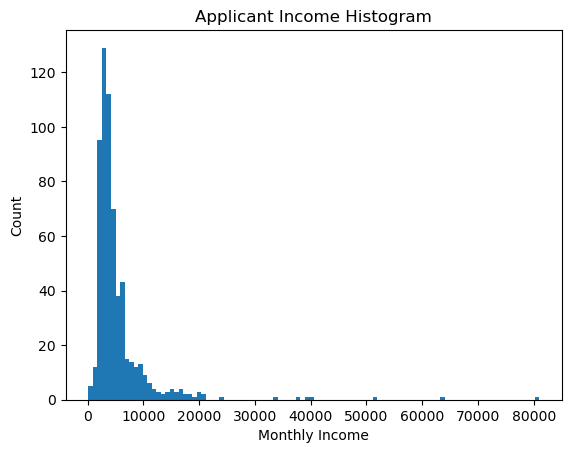

In [144]:
plt.hist(df['ApplicantIncome'],bins=100)
plt.title('Applicant Income Histogram')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

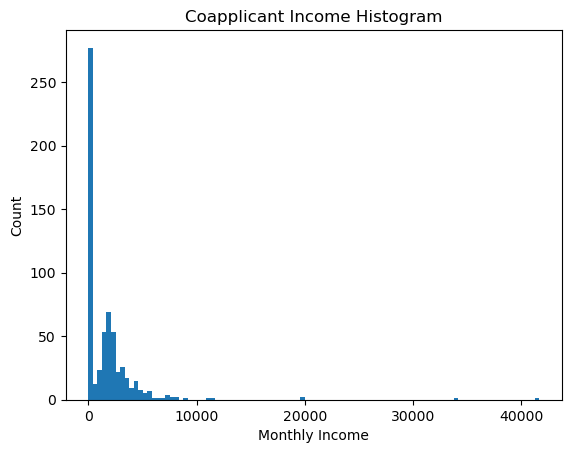

In [145]:
plt.hist(df['CoapplicantIncome'],bins=100)
plt.title('Coapplicant Income Histogram')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


Look at box plots to understand the distributions. 

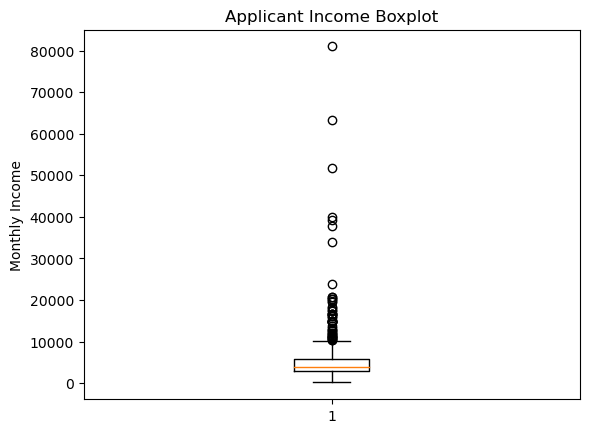

In [146]:
plt.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income Boxplot')
plt.ylabel('Monthly Income')
plt.show()

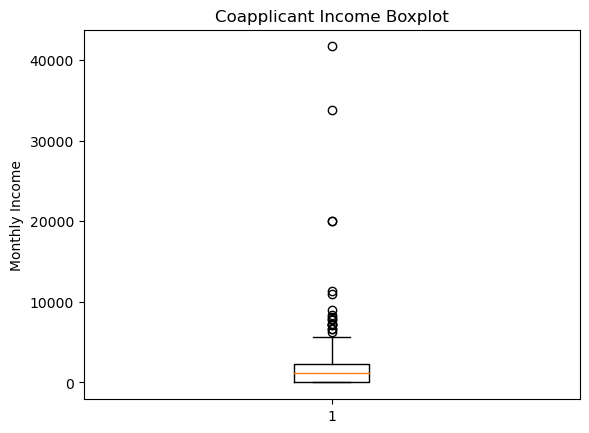

In [147]:
plt.boxplot(df['CoapplicantIncome'])
plt.title('Coapplicant Income Boxplot')
plt.ylabel('Monthly Income')
plt.show()

In [148]:
import seaborn as sns


Look at the distribution of income segregated  by `Education`

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

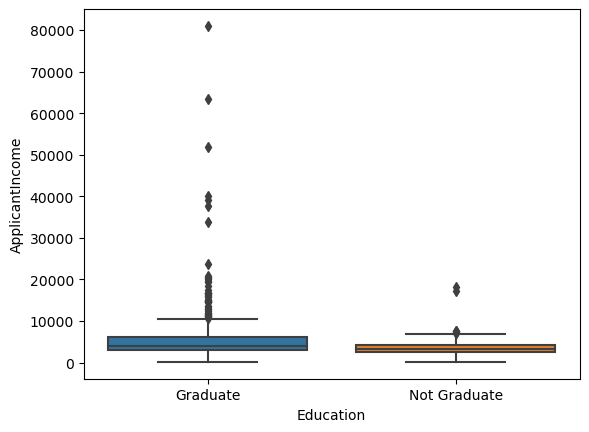

In [149]:
sns.boxplot(x = df['Education'],
            y = df['ApplicantIncome'])

Look at the histogram and boxplot of LoanAmount

<Axes: ylabel='LoanAmount'>

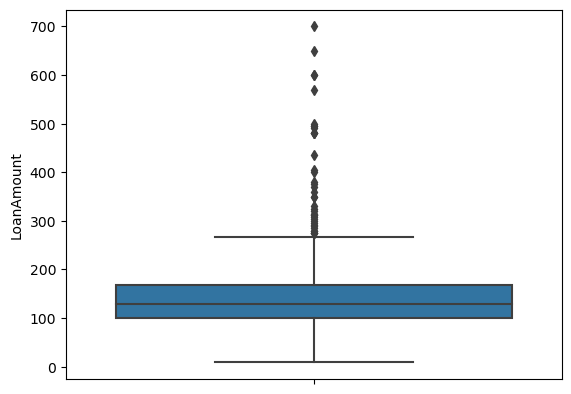

In [150]:
sns.boxplot(y = df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

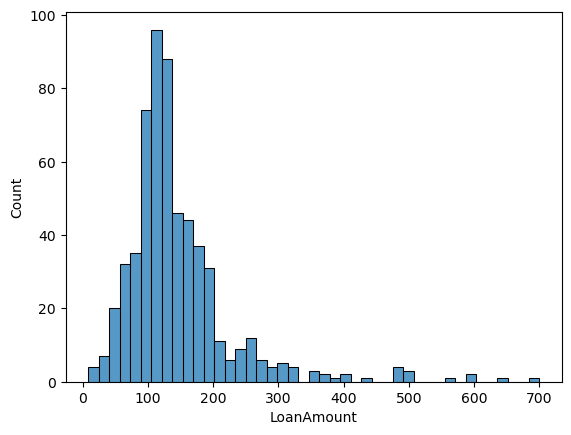

In [151]:
sns.histplot(df['LoanAmount'])

In [152]:
df.corr()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_24504\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [153]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Married'], aggfunc=np.mean)

Married,No,Yes
Gender,,
Female,4503.787500,4829.645161
Male,5236.146154,5529.540616


In [154]:
#Differences between genders income based on # of dependents
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Dependents'], aggfunc=np.mean)

Dependents,0,1,2,3+
Gender,,,,
Female,4278.100000,6487.894737,4277.857143,1776.333333
Male,5119.848837,5793.280488,5015.456522,7719.777778


<Axes: xlabel='Gender', ylabel='count'>

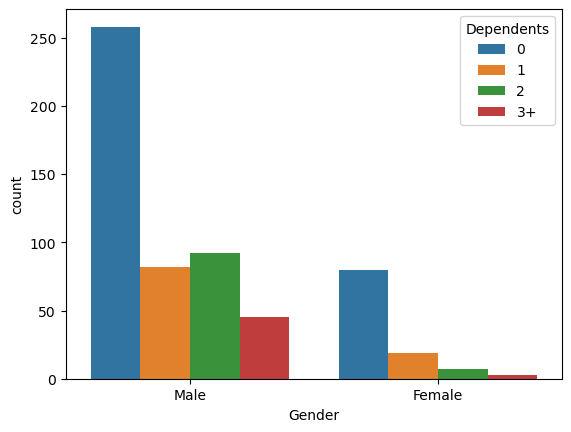

In [155]:
#Counts of above
sns.countplot(data=df, x='Gender',hue = 'Dependents')

In [156]:
#Difference in income by gender by education level
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Education'], aggfunc=np.mean)

Education,Graduate,Not Graduate
Gender,,
Female,4646.467391,4629.700000
Male,5992.345745,3630.061947


<Axes: xlabel='Gender', ylabel='count'>

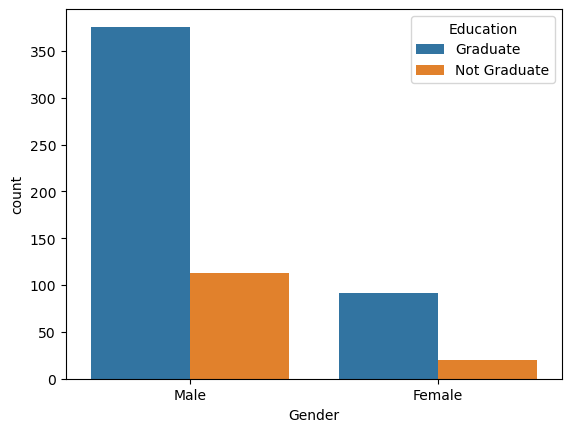

In [157]:
#Counts of above
sns.countplot(data=df, x='Gender',hue = 'Education')

In [158]:
#Difference in income for those self employed vs not
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Self_Employed'], aggfunc=np.mean)

,ApplicantIncome
Self_Employed,
No,5049.748000
Yes,7380.817073


In [159]:
#Difference in income by education level for those self employed vs not
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Self_Employed'], columns=['Education'], aggfunc=np.mean)

Education,Graduate,Not Graduate
Self_Employed,,
No,5504.203085,3457.108108
Yes,7735.507692,6024.647059


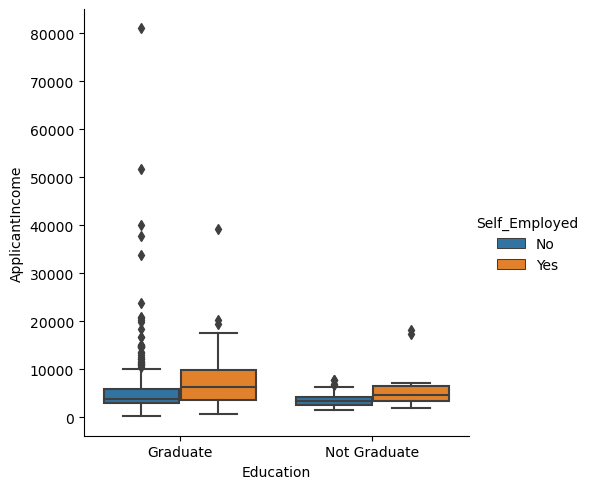

In [160]:
#boxplot of above
sns.catplot(data=df, x="Education", y="ApplicantIncome", hue = 'Self_Employed', kind='box')

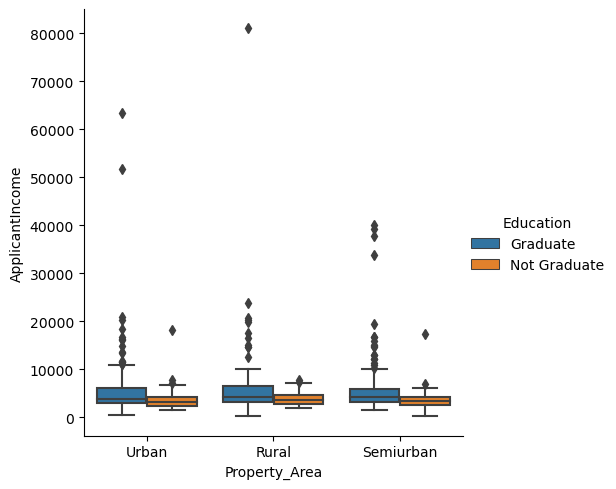

In [161]:
#Boxplot of property type by education
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Education', kind='box')

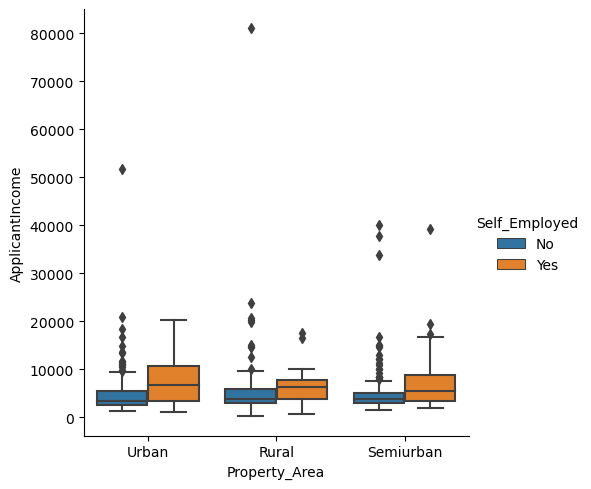

In [162]:
#boxplot of property type and employment 
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Self_Employed', kind='box')

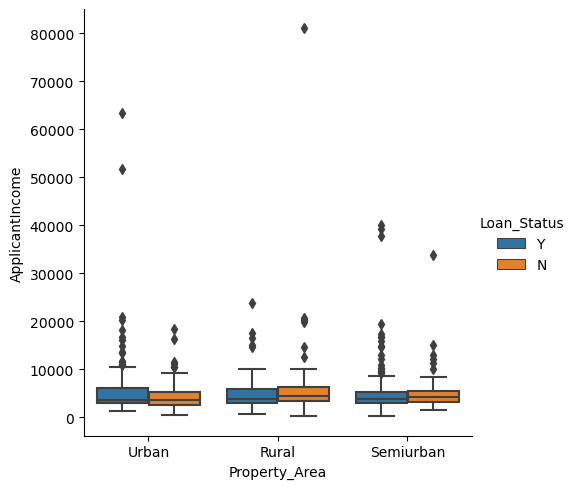

In [163]:
#boxplot of income and property area by loan status
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Loan_Status', kind='box')

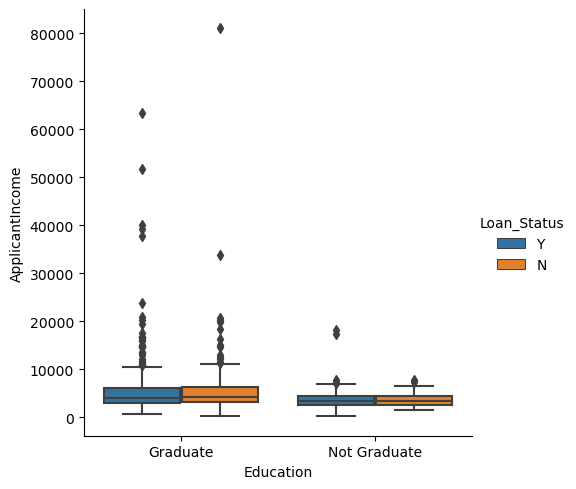

In [164]:
#Boxplot of education and income against loan_status
sns.catplot(data=df, x="Education", y="ApplicantIncome", hue = 'Loan_Status', kind='box')

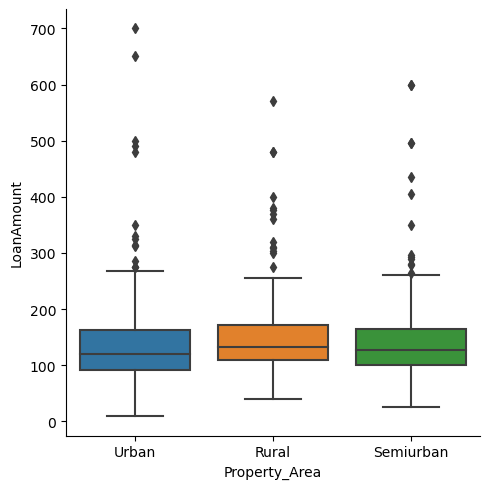

In [165]:
#boxplot of loan amount by property area
sns.catplot(data=df, x="Property_Area", y="LoanAmount", kind='box')

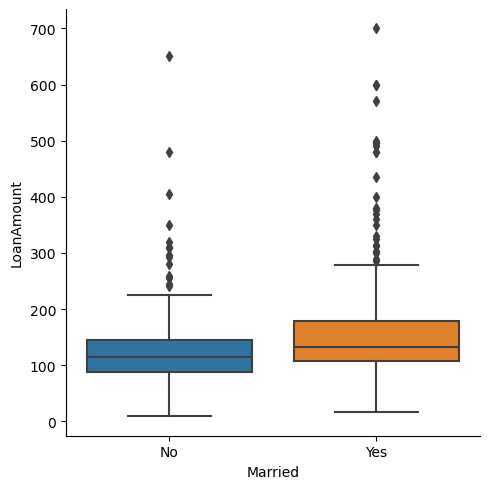

In [166]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Married", y="LoanAmount", kind='box')

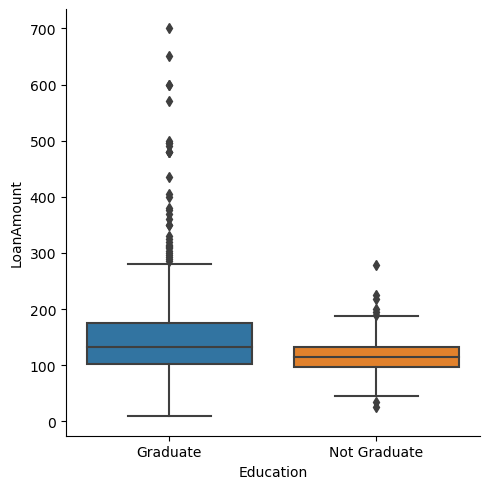

In [167]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Education", y="LoanAmount", kind='box')

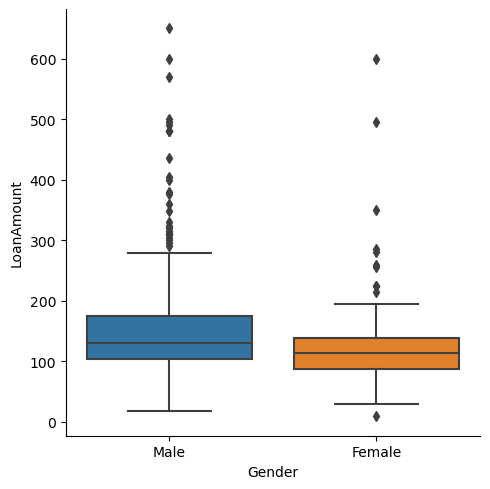

In [168]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Gender", y="LoanAmount", kind='box')

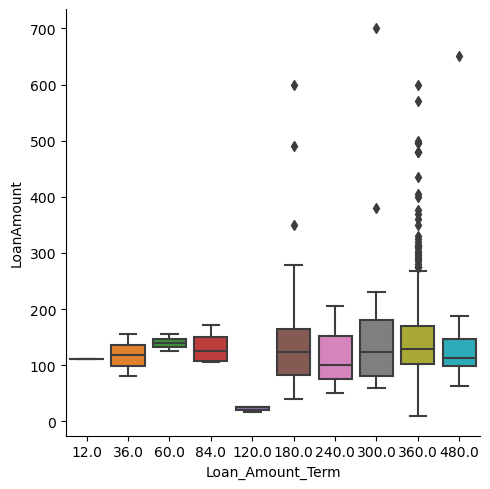

In [169]:
#boxplot of loan amount by loan amount term
sns.catplot(data=df, x="Loan_Amount_Term", y="LoanAmount", kind='box')

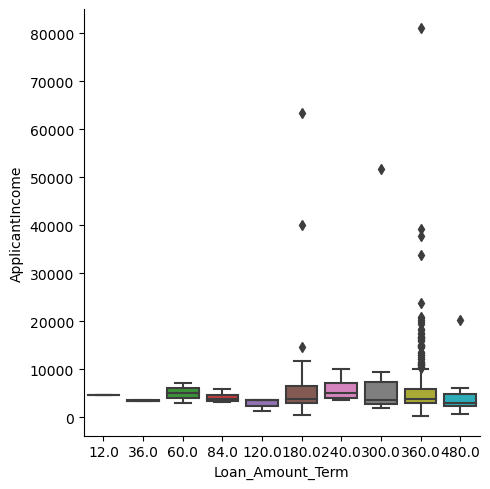

In [170]:
#boxplot of loan amount term by income
sns.catplot(data=df, x="Loan_Amount_Term", y="ApplicantIncome", kind='box')

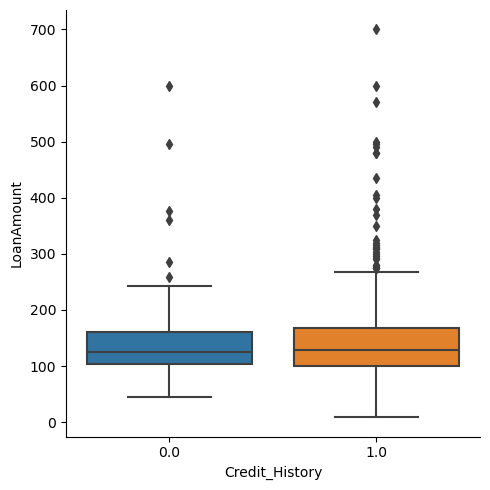

In [171]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Credit_History", y="LoanAmount", kind='box')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [172]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [173]:
df[['Education','LoanAmount']].groupby('Education').mean().iloc[0].item()

154.06021505376344

In [174]:
def null_cleaning(df):
    #Replacing Nan gender with male as this is the most common class by far
    df['Gender'] = df['Gender'].where(df['Gender'].notnull(),'Male')
    #Replace Married Nan and Dependent Nan with most likely case as well
    df['Married'] = df['Married'].where(df['Married'].notnull(),'Yes')
    df['Dependents'] = df['Dependents'].where(df['Dependents'].notnull(),'0')
    #Replace Self_Employed with most likely case
    df['Self_Employed'] = df['Self_Employed'].where(df['Self_Employed'].notnull(),'No')
    #Credit History nulls changed to 0 as if theres a blank we probably don't have their history
    df['Credit_History'] = df['Credit_History'].where(df['Credit_History'].notnull(),0)
    #Loan Amount Term set to base 360 months as loan term doesn't seem to correlate with other variables
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].where(df['Loan_Amount_Term'].notnull(),360)
    
    #Replace nulls of loanamount by mean of education group
    #Create dictionary of mean values by group and conditions to get that replacement (e.g. mean of graduate loan amount and conditions graduate = true and is null)
    graduatemean = df[['Education','LoanAmount']].groupby('Education').mean().loc['Graduate'].item()
    nongraduatemean = df[['Education','LoanAmount']].groupby('Education').mean().loc['Not Graduate'].item()
    conditions = {graduatemean : (df['Education']=='Graduate') & (df['LoanAmount'].isnull()), nongraduatemean : (df['Education']=='Not Graduate') & (df['LoanAmount'].isnull())}
    for replacement_value, condition in conditions.items():
        df.loc[condition,'LoanAmount'] = replacement_value

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [179]:
def logtransform(df):
    df['LoanAmount'] = np.log(df['LoanAmount'])
    df['TotalIncome'] = np.log(df['ApplicantIncome']+df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

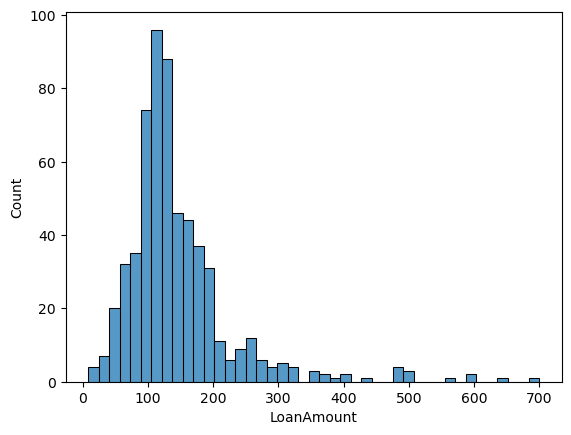

In [175]:
sns.histplot(df['LoanAmount'])

In [180]:
logtransform(df)

<Axes: xlabel='LoanAmount', ylabel='Count'>

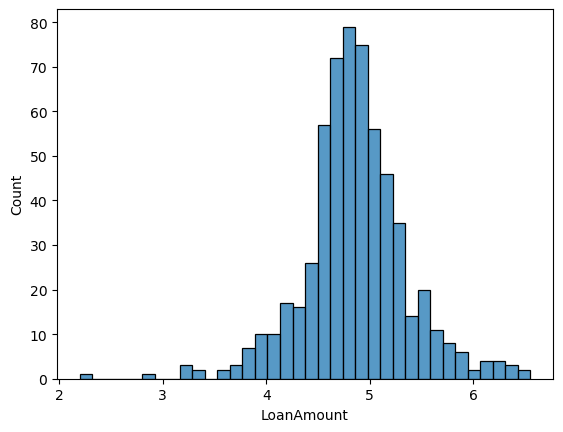

In [177]:
sns.histplot(df['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

<Axes: xlabel='TotalIncome', ylabel='Count'>

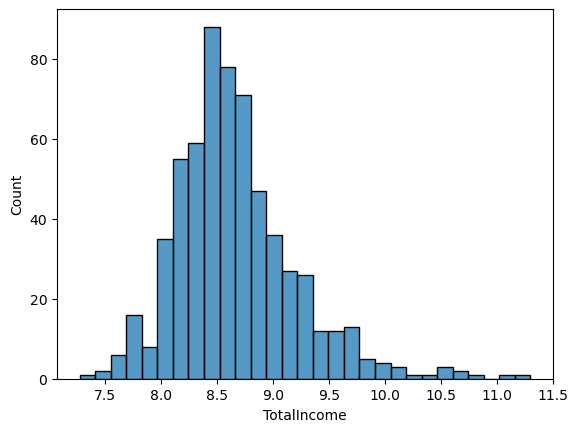

In [181]:
sns.histplot(df['TotalIncome'])

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python